In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import smtplib
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [231]:
data = pd.read_excel(r"C:\Users\soham\Downloads\Historical Dataset.1.xlsx",index_col='Sale dates',parse_dates=['Sale dates'] )
data.head()

,Name,Batch No.,Lic. No,Mfg.date,Exp.date,Price,Category,Therapeutic area (MeSH),Applicants/Holder,Medicine status,Status,Age Group,Total Sales
Sale dates,,,,,,,,,,,,,
2017-01-01,Diclofenac Sodium & Paracetamol Tablet I.P,DSPDTB-0001,N-MB/2023/251,2017-01-01,2018-12-01,1740.0,Antifungal,Hypertension,Novartis Europharm Limited,Authorised,In Stock,Below 18,233.0
2017-01-02,Cefredrox 200 DT,LPL-33351,L/20/2426/MB,2017-02-01,2019-01-01,165.0,Antibacterial,Bacterial Infections and Mycoses;Aspergillosis...,Pfizer Europe MA EEIG,Authorised,In Stock,Above 18,34.0
2017-01-03,Vertiford -24,VRD403A,L/22/2850/MNB,2017-03-01,2019-02-01,120.0,Antiallergic,Breast Neoplasms,Viatris Limited,Authorised,In Stock,Below 10,424.0
2017-01-04,Leecet,LCA403C,L/22/2852/MNB,2017-04-01,2019-03-01,21.0,Antifungal,Diabetes Mellitus,AstraZeneca AB,Authorised,In Stock,Above 18,53.0
2017-01-05,Lircetam-500,LCM301H,L/22/2850/MNB,2017-05-01,2019-04-01,145.3,Antibacterial,Esophageal Squamous Cell Carcinoma,Boehringer Ingelheim International GmbH,Authorised,Out of Stock,Above 18,236.0


In [232]:
dr = LabelEncoder()

In [233]:
label = dr.fit_transform(data['Status'])

In [234]:
data['Status'] = dr.fit_transform(data['Status'].map({'In Stock': 1, 'Out of Stock': 0}))

In [235]:
data['Status'] = data['Status'].replace({'In Stock': 1, 'Out of Stock': 0})

In [236]:
data.head()

,Name,Batch No.,Lic. No,Mfg.date,Exp.date,Price,Category,Therapeutic area (MeSH),Applicants/Holder,Medicine status,Status,Age Group,Total Sales
Sale dates,,,,,,,,,,,,,
2017-01-01,Diclofenac Sodium & Paracetamol Tablet I.P,DSPDTB-0001,N-MB/2023/251,2017-01-01,2018-12-01,1740.0,Antifungal,Hypertension,Novartis Europharm Limited,Authorised,1,Below 18,233.0
2017-01-02,Cefredrox 200 DT,LPL-33351,L/20/2426/MB,2017-02-01,2019-01-01,165.0,Antibacterial,Bacterial Infections and Mycoses;Aspergillosis...,Pfizer Europe MA EEIG,Authorised,1,Above 18,34.0
2017-01-03,Vertiford -24,VRD403A,L/22/2850/MNB,2017-03-01,2019-02-01,120.0,Antiallergic,Breast Neoplasms,Viatris Limited,Authorised,1,Below 10,424.0
2017-01-04,Leecet,LCA403C,L/22/2852/MNB,2017-04-01,2019-03-01,21.0,Antifungal,Diabetes Mellitus,AstraZeneca AB,Authorised,1,Above 18,53.0
2017-01-05,Lircetam-500,LCM301H,L/22/2850/MNB,2017-05-01,2019-04-01,145.3,Antibacterial,Esophageal Squamous Cell Carcinoma,Boehringer Ingelheim International GmbH,Authorised,0,Above 18,236.0


In [237]:
ts=data["Status"].resample('M').sum()
ts.head()

Sale dates
2017-01-31    17
2017-02-28    21
2017-03-31    17
2017-04-30    19
2017-05-31    19
Freq: M, Name: Status, dtype: int64

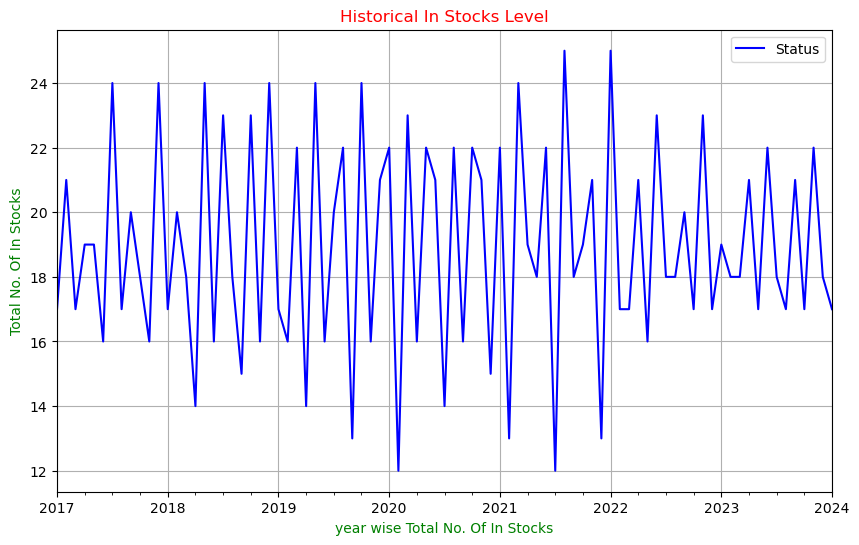

In [238]:
ts.plot(c='b',figsize=(10,6))
plt.grid()
plt.xlabel('year wise Total No. Of In Stocks',c='g')
plt.ylabel('Total No. Of In Stocks',c='g')
plt.title('Historical In Stocks Level',c='r')
plt.legend()
plt.show()

In [239]:
len(ts)

85

In [240]:
train =ts[:64]
test =ts[64:]

In [241]:
from statsmodels.tsa.arima.model import ARIMA

In [242]:
model = ARIMA(train, order=(5,0,4))
model_fit = model.fit()
forecast = model_fit.predict(params=model_fit.params)

In [243]:
import warnings
warnings.filterwarnings('ignore')

In [244]:
forecast_steps = 64

In [245]:
predictions = model_fit.predict(start=len(train), end=len(train) + forecast_steps - 1, typ='levels')

In [246]:
len(train),(len(ts)-1)

(64, 84)

In [247]:
final_model = ARIMA(ts,order=(5,0,4)).fit()

In [248]:
predictions = final_model.predict(len(ts),len(ts)+6)

In [249]:
predictions.head()

2024-02-29    20.750194
2024-03-31    16.870705
2024-04-30    21.970119
2024-05-31    17.933547
2024-06-30    17.880889
Freq: M, Name: predicted_mean, dtype: float64

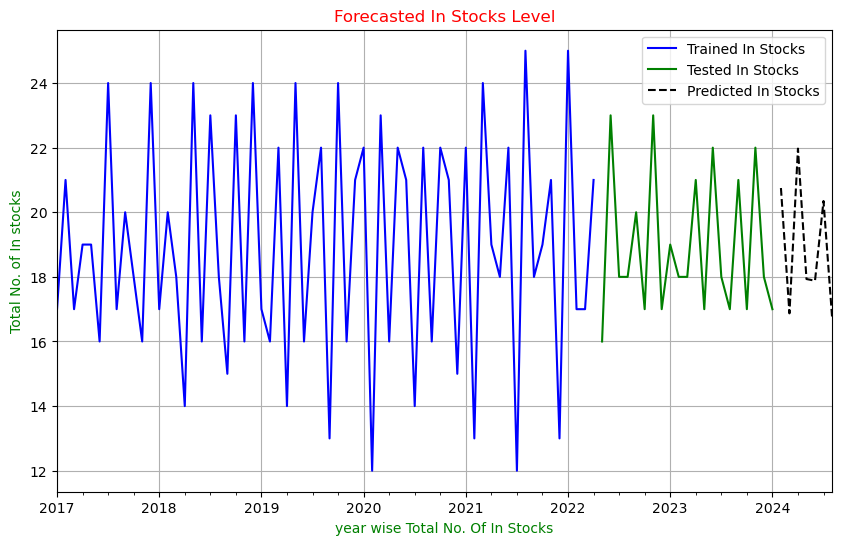

In [256]:
train.plot(legend=True,label='Trained In Stocks',c='b',figsize=(10,6))
test.plot(legend=True,label='Tested In Stocks',c='g')
predictions.plot(legend=True,label='Predicted In Stocks',c='Black',ls='--')
plt.ylabel('Total No. of In stocks',c='g')
plt.xlabel('year wise Total No. Of In Stocks',c='g')
plt.title('Forecasted In Stocks Level',c='r')
plt.grid()
plt.show()

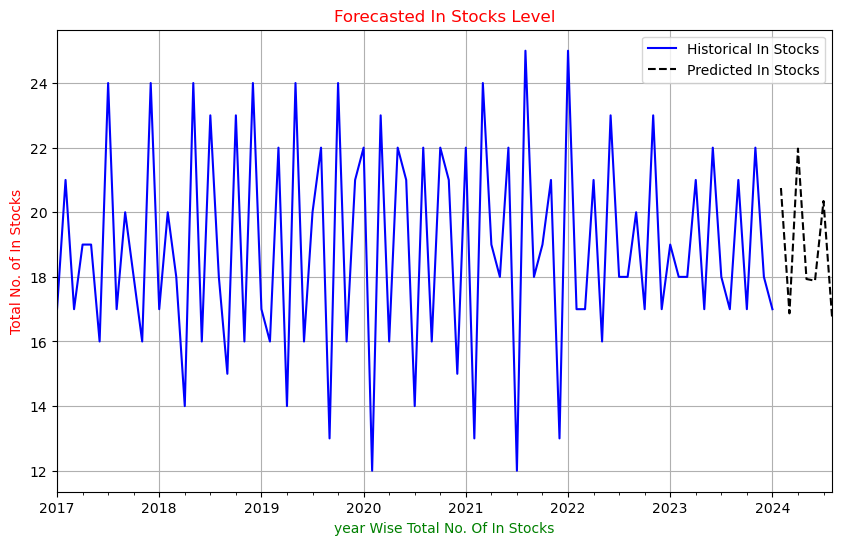

In [251]:
ts.plot(legend=True,label='Historical In Stocks',c='b',figsize=(10,6))
predictions.plot(legend=True,label='Predicted In Stocks',c='Black',ls='--')
plt.grid()
plt.ylabel('Total No. of In Stocks',c='r')
plt.xlabel('year Wise Total No. Of In Stocks',c='g')
plt.title('Forecasted In Stocks Level',c='r')
plt.show()

In [252]:
predictions

2024-02-29    20.750194
2024-03-31    16.870705
2024-04-30    21.970119
2024-05-31    17.933547
2024-06-30    17.880889
2024-07-31    20.348241
2024-08-31    16.774445
Freq: M, Name: predicted_mean, dtype: float64

In [253]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Status   No. Observations:                   64
Model:                 ARIMA(5, 0, 4)   Log Likelihood                 -85.210
Date:                Mon, 16 Sep 2024   AIC                            192.420
Time:                        16:53:57   BIC                            216.167
Sample:                    01-31-2017   HQIC                           201.775
                         - 04-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.9651      0.014   1314.020      0.000      18.937      18.993
ar.L1         -0.5193      0.295     -1.758      0.079      -1.098       0.060
ar.L2         -0.3002      0.278     -1.079      0.2